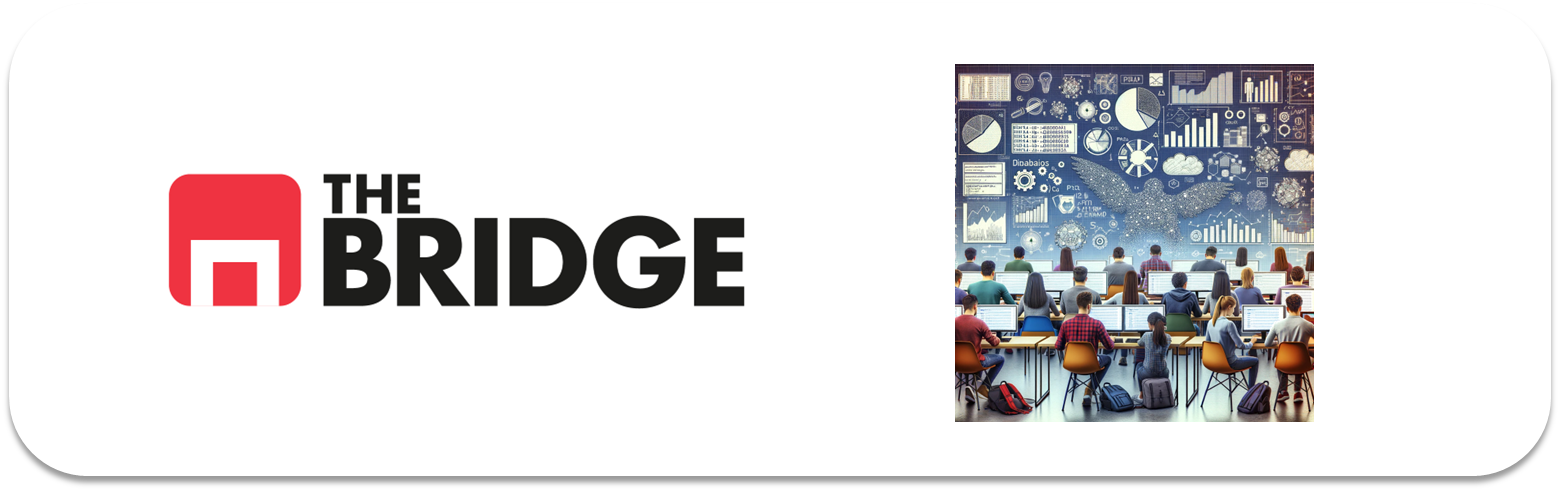

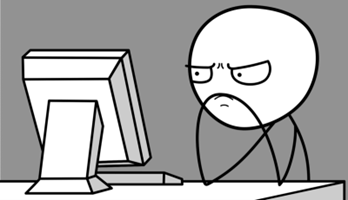

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [3]:
df_adv = pd.read_csv("./data/advertising_ml.csv")
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [4]:
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


- Las columnas como Age y Timestamp son "objects", lo cual puede no ser adecuado.

- Clicked on Ad: esta seguramente es la variable objetivo (target), y seguramente sea binaria.

- Timestamp: si contiene fecha y hora, debería convertirse a datetime.

### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Esto es un problema de clasificación binaria, porque:

- El objetivo es predecir si un usuario hará clic o no en un anuncio (dos posibles resultados: "sí" o "no").

- El output del modelo será una clase, no un valor continuo.

Estamos en un caso de aprendizaje supervisado, ya que:

- Tenemos un conjunto de datos etiquetado, es decir, para cada usuario sabemos si hizo clic o no en el anuncio.

- Vamos a entrenar el modelo con ejemplos de entrada (datos del usuario) y su correspondiente salida (clic o no clic) para que aprenda a predecir la salida en nuevos casos.

La variable objetivo o target es "Clicked on Ad".

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [5]:
# CARDINALIDAD
df_adv.nunique()

Daily Time Spent on Site     900
Age                           83
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

### 📊 Variables del dataset `advertising_ml.csv`


| **Columna**                 | **Descripción**                                                                 | **Tipo pandas** | **Cardinalidad**
|----------------------------|----------------------------------------------------------------------------------|------------------|------------------|
| `Daily Time Spent on Site` | Tiempo medio diario (en minutos) que el usuario pasa en el sitio web.           | `float64`        | 900 Alta variedad, numérica continua
| `Age`                      | Edad del usuario.                                                               | `int64`          | 83 Numérica discreta, hay que limpiar y dejar solo los números enteros
| `Area Income`              | Media de ingresos del área (en dólares) del usuario.                            | `float64`        | 1000 Numérica continua
| `Daily Internet Usage`     | Tiempo medio diario (en minutos) que el usuario usa Internet.                   | `float64`        | 966 Numérica continua
| `Ad Topic Line`            | Frase principal del anuncio.                                                    | `object`         | 1000 Texto libre, no útil sin procesamiento NLP
| `City`                     | Ciudad del usuario.                                                             | `object`         | 969 Alta cardinalidad categórica, eliminar o agrupar
| `Male`                     | Género del usuario (1 = hombre, 0 = mujer).                                     | `object`         | 2 Binaria
| `Country`                  | País del usuario.                                                               | `object`         | 237 Alta cardinalidad. Posible agrupación. 
| `Timestamp`                | Fecha y hora del acceso.                                                        | `object`         | 1000 Valor único, hay que cambiarlo a datetime
| `Clicked on Ad`            | Si el usuario hizo clic en el anuncio (1) o no (0).                             | `object`         | 2 Binaria, variable target

In [6]:
df_adv.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,55000.000080,180.000100,0.481000,0.50000
std,15.853615,13414.634022,43.902339,0.499889,0.50025
min,32.600000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,65470.635000,218.792500,1.000000,1.00000
max,91.430000,79484.800000,269.960000,1.000000,1.00000


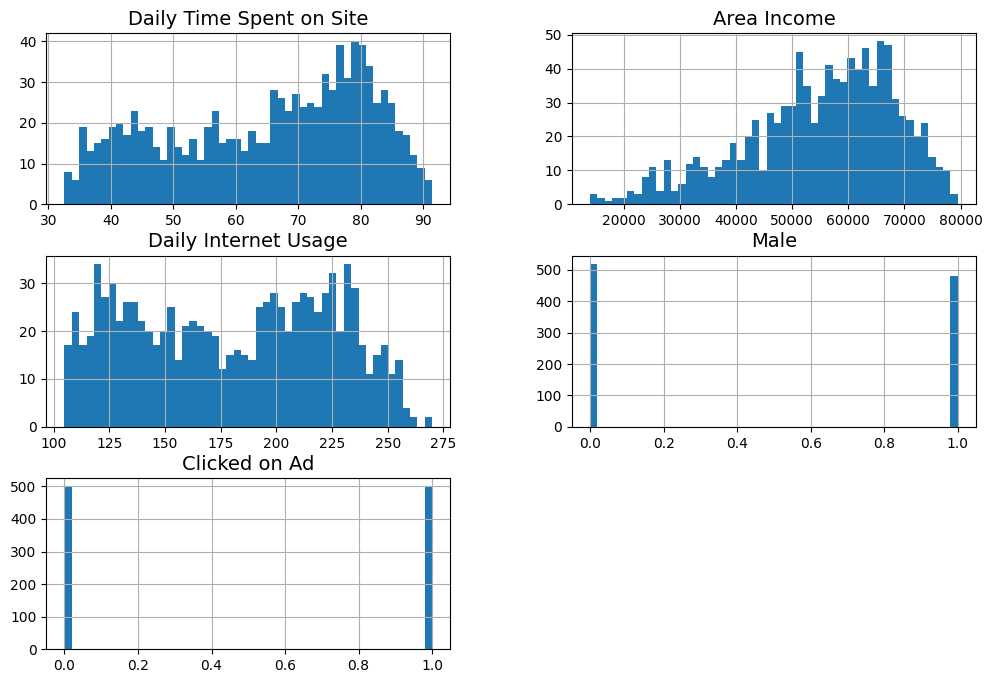

In [7]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_adv.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [8]:
# Extraer número de la cadena '35 years' y convertirlo a int
df_adv['Age'] = df_adv['Age'].str.extract('(\d+)').astype(int)

# Convertir 'Timestamp' a datetime
df_adv['Timestamp'] = pd.to_datetime(df_adv['Timestamp'])

# Convertir Age a tipo entero (por si acaso no lo fuera)
df_adv['Age'] = df_adv['Age'].astype(int)

In [9]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [10]:
# Extraer hora
df_adv['Hour'] = df_adv['Timestamp'].dt.hour

# Extraer día de la semana (0 = lunes, 6 = domingo)
df_adv['DayOfWeek'] = df_adv['Timestamp'].dt.dayofweek

# Extraer mes
df_adv['Month'] = df_adv['Timestamp'].dt.month

# Crear una variable categórica 'Period' basada en la hora
def get_period(hour):
    if hour < 12:
        return 'Mañana'
    elif hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

df_adv['Period'] = df_adv['Hour'].apply(get_period)

In [11]:
columnas_a_conservar = [
    'Daily Time Spent on Site',
    'Age',
    'Area Income',
    'Daily Internet Usage',
    'Male',
    'Clicked on Ad',
    'Country',
    'Hour',
    'DayOfWeek',
    'Month',
    'Period'
]

df_model = df_adv[columnas_a_conservar]
df_model

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Country,Hour,DayOfWeek,Month,Period
0,68.95,35,61833.90,256.09,0,0,Tunisia,0,6,3,Mañana
1,80.23,31,68441.85,193.77,1,0,Nauru,1,0,4,Mañana
2,69.47,26,59785.94,236.50,0,0,San Marino,20,6,3,Noche
3,74.15,29,54806.18,245.89,1,0,Italy,2,6,1,Mañana
4,68.37,35,73889.99,225.58,0,0,Iceland,3,4,6,Mañana
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,Lebanon,21,3,2,Noche
996,51.30,45,67782.17,134.42,1,1,Bosnia and Herzegovina,2,4,4,Mañana
997,51.63,51,42415.72,120.37,1,1,Mongolia,17,0,2,Tarde
998,55.55,19,41920.79,187.95,0,0,Guatemala,2,3,3,Mañana


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [12]:
# Separar variables predictoras y target
X = df_model.drop('Clicked on Ad', axis=1)
y = df_model['Clicked on Ad']

In [13]:
train_set, test_set = train_test_split(df_model, test_size=0.2, random_state=42)
len(train_set)

800

In [14]:
len(test_set)

200

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

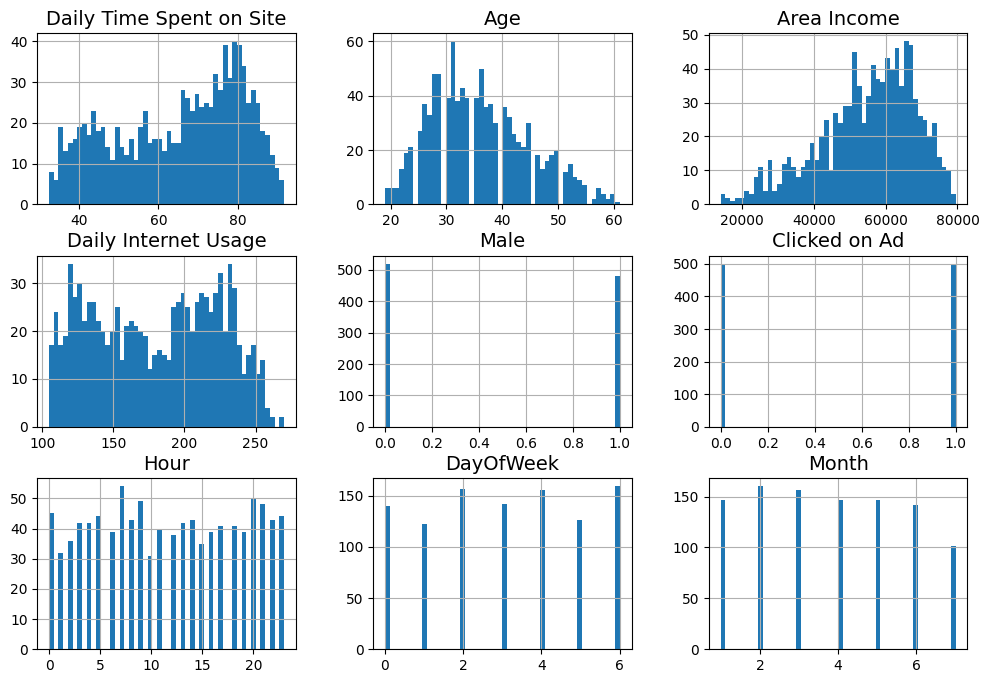

In [15]:
df_model.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [17]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["Clicked on Ad"].sort_values(ascending = False)

Clicked on Ad               1.000000
Age                         0.482848
DayOfWeek                   0.013717
Month                       0.012848
Hour                       -0.034780
Male                       -0.043798
Area Income                -0.498504
Daily Time Spent on Site   -0.745492
Daily Internet Usage       -0.812130
Name: Clicked on Ad, dtype: float64

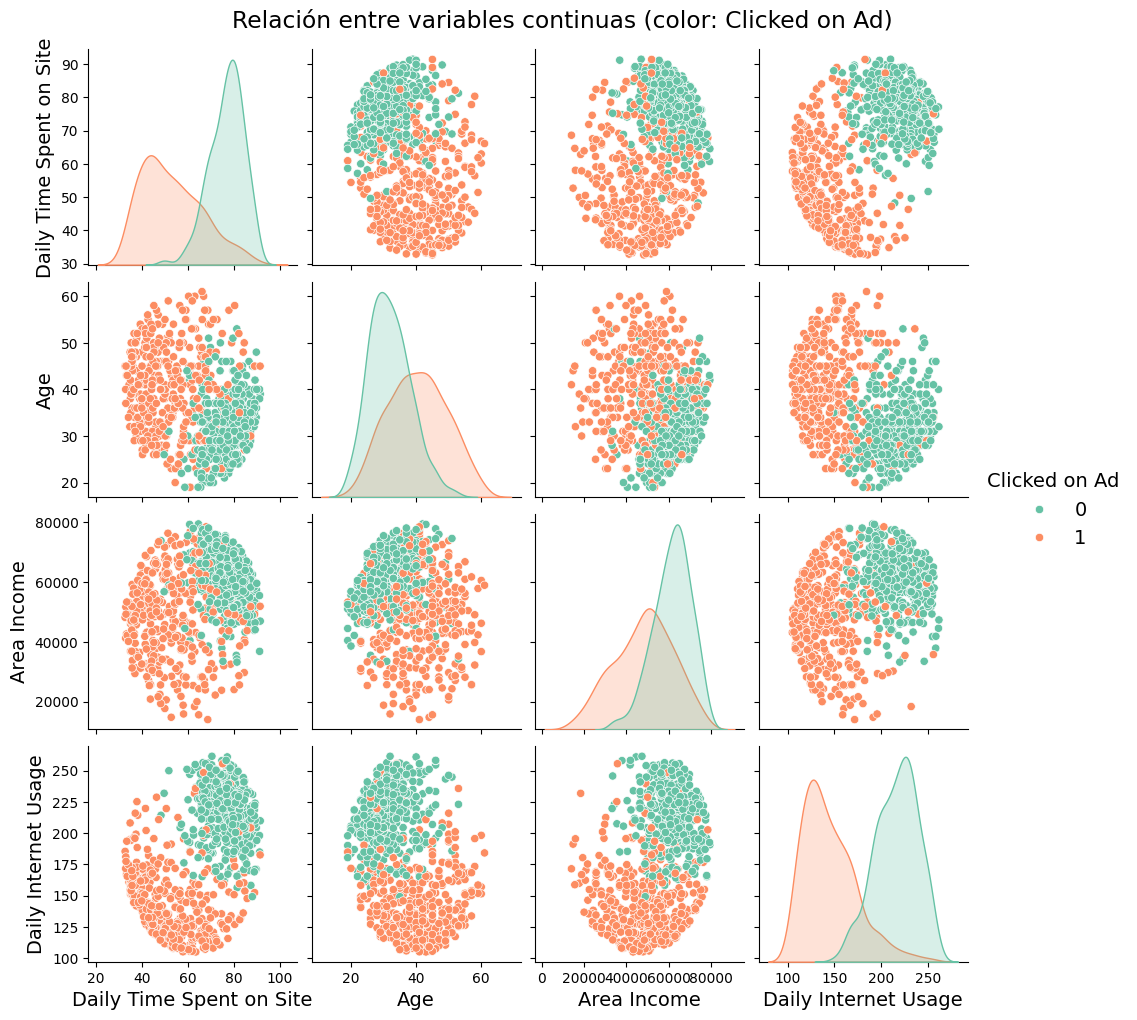

In [16]:
# 1. Seleccionar solo las variables continuas + target
variables_continuas = [
    'Daily Time Spent on Site',
    'Age',
    'Area Income',
    'Daily Internet Usage',
    'Clicked on Ad'  # se usa como hue
]

df_continuas = df_model[variables_continuas]

# 2. Dividir en train y test (80-20)
train_df, test_df = train_test_split(df_continuas, test_size=0.2, random_state=42)

# 3. Pairplot
sns.pairplot(train_df, hue='Clicked on Ad', palette='Set2', diag_kind='kde')
plt.suptitle('Relación entre variables continuas (color: Clicked on Ad)', y=1.02)
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features: